# Lernmodul Texte

<div style="background-color:red;display:inline;font-size:1.25rem;padding:20px;">Stand 10.12.20</div>

1. [Einführung](#einführung)
    1. [Motivation](#motivation)
    2. [Voraussetzungen](#voraussetzungen)
2. [Daten](#daten)
    1. [Textdaten beschaffen](#beschaffen)
    2. [Textdaten erkunden](#erkunden)
    3. [Textdaten aufbereiten](#aufbereiten)
3. [Modell](#modell)
    1. Textdaten einbetten
    2. Textdaten klassifizieren
4. [Verwendung](#verwendung)
5. [Abschluss](#abschluss)

## 1. <a id='einführung'>Einführung</a>

### 1.1 <a id='motivation'>Motivation</a>

Die Verarbeitung menschlicher Sprache (Natural Language Processing, NLP) ist ein prominentes Forschungsfeld der Informatik mit ähnlichem Bekanntheitsgrad wie die Analyse visueller Daten (Computer Vision), welche bspw. das Erkennen von Bildern (Image Recognition) sowie ihre Manipulation (Image Augmentation) betrachtet. Im ersten Fall wollen wir einen bekannten bzw. alten Bildinhalt klassifizieren, während der zweite Fall einen unbekannten bzw. neuen Bildinhalt erzeugt.

Wechseln wir von der Bild- auf die Textebene, lässt sich das Forschungsfeld des _NLP_ auf ähnliche Problemstellungen herunterbrechen, die in der folgenden Auflistung aufgeführt sind:

* Texterkennung (Text Recognition)
  * Spracherkennung (Speech Recognition)
  * Stimmungsanalyse (Sentiment Analyses)
* Textmanipulation (Text Augmentation)
  * Maschinelle Übersetzung (Machine Translation)
  * Automatisches Antworten (Question Answering)

Ihr könnt euch bestimmt vorstellen, dass die Erzeugung von gänzlich Neuem aufwendiger ist, als das Entscheiden über vorliegende Inhalte und so beschäftigt sich dieses Lernmodul mit der Texterkennung, im besonderen mit der Unterscheidung zwischen verschiedenen Stimmungen, welche der Verfasser eines Textes gehabt haben könnte. Ein aktuelles Anwendungsbeispiel ist die Identifikation von Hassreden, wie sie bspw. von [Facebook](https://www.facebook.com/) im Zuge ihrer [Community Standards](https://www.facebook.com/communitystandards/hate_speech) verboten sind und erkannt werden müssen.

### 1.2 <a id='voraussetzungen'>Voraussetzungen</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. <a id='daten'>Daten</a>

Daten -> Modell -> Verwendung

Eingabe -> Modell -> Ausgabe

Merkmale -> Modell -> Vorhersage

Datensatz - Eine Sammlung von Beispielen

Beispiel - Eine Sammlung von Merkmalen

Merkmal - Ein numerischer oder symbolischer Wert


### 2.1 <a id='beschaffen'>Textdaten beschaffen</a>

In [2]:
twitter = pd.read_json('./tweets.json.gz', compression='gzip')

### 2.2 <a id='erkunden'>Textdaten erkunden</a>

In [3]:
print("Wie sieht der Datensatz aus?")
twitter.head()

Wie sieht der Datensatz aus?


,twista,type,id,user,created_at,recorded_at,source,retweets,favourites,lang,...,screen_name,location,description,url,verified,followers,friends,listed,statuses,refers_to
0,0.3.1-b,status,1212046141279354880,1.140992e+18,2019-12-31 16:21:33+00:00,2019-12-31 16:21:39.286956+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3.1-b,status,1212046145645662208,7.137519e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.657847+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3.1-b,status,1212046145737961472,7.158583e+17,2019-12-31 16:21:34+00:00,2019-12-31 16:21:39.700276+00:00,"<a href=""http://www.facebook.com/twitter"" rel=...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3.1-b,status,1211821086905683968,1.106642e+18,2019-12-31 01:27:16+00:00,2019-12-31 16:21:40.016141+00:00,"<a href=""http://twitter.com/download/iphone"" r...",1582.0,4518,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.3.1-b,status,1212046149990916096,9.990299e+08,2019-12-31 16:21:35+00:00,2019-12-31 16:21:40.711065+00:00,"<a href=""http://twitter.com/download/android"" ...",0.0,0,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Wie viele Werte liegen insgesamt vor?")
twitter.size

Wie viele Werte liegen insgesamt vor?


1300000

In [5]:
print("Wie viele Beispiele liegen insgesamt vor?")
twitter.shape[0]

Wie viele Beispiele liegen insgesamt vor?


50000

In [6]:
print("Wie viele Werte liegen pro Beispiel vor?")
twitter.shape[1]

Wie viele Werte liegen pro Beispiel vor?


26

In [7]:
print("Welche Merkmale bzw. Wertetypen liegen vor?")
twitter.dtypes

Welche Merkmale bzw. Wertetypen liegen vor?


twista                        object
type                          object
id                             int64
user                         float64
created_at       datetime64[ns, UTC]
recorded_at      datetime64[ns, UTC]
source                        object
retweets                     float64
favourites                     int64
lang                          object
hashtags                      object
urls                          object
mentions                      object
mentioned_ids                 object
text                          object
name                          object
screen_name                   object
location                      object
description                   object
url                           object
verified                     float64
followers                    float64
friends                      float64
listed                       float64
statuses                     float64
refers_to                    float64
dtype: object

In [8]:
print("Das Merkmal 'text' scheint die Tweets zu beinhalten")
tweets = twitter['text']
tweets.head()

Das Merkmal 'text' scheint die Tweets zu beinhalten


0    Hahaha.., da haben "die Nazis" aber Glück 🍀 ge...
1    Ich wünsche allen guten Menschen ein gesundes ...
2    Wir wünschen euch einen guten Rutsch und für d...
3    niggas pull a bad bitch and be insecure as hel...
4    31.12.2019. Breitscheidplatz. Weihnachtsmarkt....
Name: text, dtype: object

### 2.3 <a id='aufbereiten'>Textdaten aufbereiten</a>

In [9]:
print("Als Nächstes werden wir alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind...")
tweets_cleaned = tweets.replace(regex={'[^a-zA-Z0-9äöüßÄÖU\s]' : ''}) # Preserve a-z A-Z 0-9 äöü ß ÄÖÜ
tweets_cleaned.head()

Als Nächstes werden wir alle Symbole entfernen, die weder dem Alphabet angehören, noch Ziffern sind...


0    Hahaha da haben die Nazis aber Glück  gehabt u...
1    Ich wünsche allen guten Menschen ein gesundes ...
2    Wir wünschen euch einen guten Rutsch und für d...
3    niggas pull a bad bitch and be insecure as hel...
4    31122019 Breitscheidplatz Weihnachtsmarkt Aus ...
Name: text, dtype: object

In [10]:
print("Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:")
tweets_tokenized = tweets_cleaned.str.split()
tweets_tokenized.head()

Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:


0    [Hahaha, da, haben, die, Nazis, aber, Glück, g...
1    [Ich, wünsche, allen, guten, Menschen, ein, ge...
2    [Wir, wünschen, euch, einen, guten, Rutsch, un...
3    [niggas, pull, a, bad, bitch, and, be, insecur...
4    [31122019, Breitscheidplatz, Weihnachtsmarkt, ...
Name: text, dtype: object

In [11]:
tweets_tokenized = tweets_tokenized[:20] # Start with 20 tweets

In [12]:
tweets_length = [len(tweet) for tweet in tweets_tokenized]
print("Wie viele Wörter sind im längsten Tweet enthalten?")
np.max(tweets_length)

Wie viele Wörter sind im längsten Tweet enthalten?


51

In [13]:
def plot_tweet_length_distribution(tweets_length):
    """Count tokens per tweet and plot their length distribution."""

    plt.hist(tweets_length, np.max(tweets_length))
    plt.xlabel('Words per tweet')
    plt.ylabel('Amount of tweets')
    plt.title('Tweet length distribution')
    plt.show()

Wie viele Tweets haben eine bestimmte Länge?


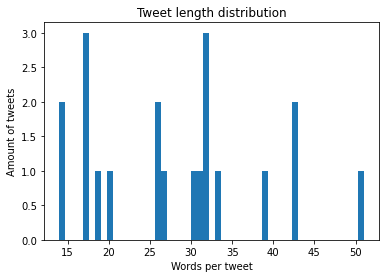

In [14]:
print("Wie viele Tweets haben eine bestimmte Länge?")
plot_tweet_length_distribution(tweets_length)

FreqDist <a href="http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist">📄</a>

In [15]:
from nltk.probability import FreqDist
fd = FreqDist(tweets_tokenized.aggregate(np.concatenate))

In [16]:
print("Wie lauten die zehn häufigsten Wörter?")
fd.most_common(10)

Wie lauten die zehn häufigsten Wörter?


[('und', 12),
 ('SUHO', 12),
 ('BEST', 12),
 ('LEADER', 12),
 ('ein', 10),
 ('Ich', 7),
 ('Jahr', 6),
 ('2020', 6),
 ('a', 6),
 ('auf', 6)]

Wie sieht das Histogramm dazu aus?


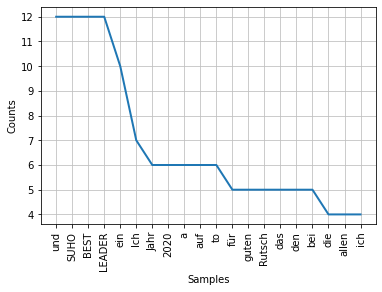

In [17]:
print("Wie sieht das Histogramm dazu aus?")
fd.plot(20)

Word Cloud <a href="http://amueller.github.io/word_cloud/index.html">📄</a>

In [18]:
from wordcloud import WordCloud
wc = WordCloud()

Wie sieht die Visualisierung davon aus?


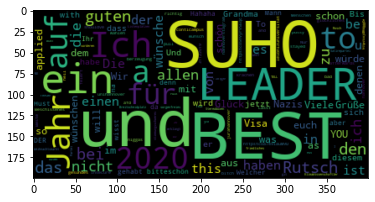

In [19]:
plt.imshow(wc.generate_from_frequencies(fd), interpolation="bilinear")
print("Wie sieht die Visualisierung davon aus?")
plt.show()

## 3. <a id='modell'>Modell</a>

### 3.1 Textdaten einbetten

#### 3.1.1 Positive Wörter

In [20]:
positive = pd.read_csv('./positive.txt', lineterminator='\n', sep='\t', header=0, names=['Word', 'Score', 'Declination'])
positive.head()

,Word,Score,Declination
0,Abschluß|NN,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen"
1,Abstimmung|NN,0.004,Abstimmungen
2,Agilität|NN,0.004,NaN
3,Aktivität|NN,0.004,Aktivitäten
4,Aktualisierung|NN,0.004,Aktualisierungen


In [21]:
print("Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.")
positive[['Word', 'Appendix']] = positive['Word'].str.split('|', 1, expand=True)
positive.head()

Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.


,Word,Score,Declination,Appendix
0,Abschluß,0.004,"Abschlüße,Abschlußs,Abschlußes,Abschlüßen",NN
1,Abstimmung,0.004,Abstimmungen,NN
2,Agilität,0.004,NaN,NN
3,Aktivität,0.004,Aktivitäten,NN
4,Aktualisierung,0.004,Aktualisierungen,NN


In [22]:
positive['Declination'] = positive['Declination'].str.split(',')
positive.sort_values(by='Score')

,Word,Score,Declination,Appendix
0,Abschluß,0.0040,"[Abschlüße, Abschlußs, Abschlußes, Abschlüßen]",NN
798,erheblich,0.0040,"[erheblichste, erheblicherem, erheblichsten, e...",ADJX
797,erhebend,0.0040,"[erhebendstem, erhebendsten, erhebender, erheb...",ADJX
796,erhalten,0.0040,NaN,VVINF
1435,unfehlbar,0.0040,"[unfehlbares, unfehlbarstem, unfehlbarsten, un...",ADJX
...,...,...,...,...
1342,spannend,0.7165,"[spannendste, spannender, spannendes, spannend...",ADJX
1581,wunderbar,0.7234,"[wunderbarerem, wunderbarste, wunderbarster, w...",ADJX
301,Lob,0.7246,"[Loben, Lobs, Lobes, Lobe]",NN
1214,perfekt,0.7299,"[perfekterer, perfektest, perfekteren, perfekt...",ADJX


#### 3.1.2 Negative Wörter

In [23]:
negative = pd.read_csv('./negative.txt', lineterminator='\n', sep='\t', header=0, names=['Word', 'Score', 'Declination'])
negative.head()

,Word,Score,Declination
0,Abbruch|NN,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen"
1,Abdankung|NN,-0.0048,Abdankungen
2,Abdämpfung|NN,-0.0048,Abdämpfungen
3,Abfall|NN,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen"
4,Abfuhr|NN,-0.3367,Abfuhren


In [24]:
print("Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.")
negative[['Word', 'Appendix']] = negative['Word'].str.split('|', 1, expand=True)
negative.head()

Als Nächstes werden wir den Zusatz hinter dem senkrechten Strich (|) vom Wort lösen.


,Word,Score,Declination,Appendix
0,Abbruch,-0.0048,"Abbruches,Abbrüche,Abbruchs,Abbrüchen",NN
1,Abdankung,-0.0048,Abdankungen,NN
2,Abdämpfung,-0.0048,Abdämpfungen,NN
3,Abfall,-0.0048,"Abfalles,Abfälle,Abfalls,Abfällen",NN
4,Abfuhr,-0.3367,Abfuhren,NN


In [25]:
negative['Declination'] = negative['Declination'].str.split(',')
negative.sort_values(by='Score')

,Word,Score,Declination,Appendix
235,Gefahr,-1.0000,[Gefahren],NN
464,Schuld,-0.9686,[Schulden],NN
1538,unnötig,-0.9463,"[unnötigstes, unnötigere, unnötige, unnötigere...",ADJX
1378,schädlich,-0.9269,"[schädlicher, schädlicheren, schädlichem, schä...",ADJX
1366,schwach,-0.9206,"[schwächstem, schwächsten, schwächster, schwäc...",ADJX
...,...,...,...,...
725,androhen,-0.0048,"[angedroht, androhte, androhest, androhtest, a...",VVINF
721,alt,-0.0048,"[alte, altem, alten, ältest, alter, altes, ält...",ADJX
736,anstrengen,-0.0048,"[anstrengtet, anstrengest, anstrenget, angestr...",VVINF
1816,überwältigen,-0.0048,"[überwältigest, überwältigten, überwältige, üb...",VVINF


In [26]:
negative_positive = {'negative' : negative, 'positive' : positive}

### 3.2 Textdaten klassifizieren

In [27]:
def classify(sequence):
    
    result = { 'negative' : {}, 'positive' : {}}
    
    for key, value in negative_positive.items():
            
        result[key] = {'score' : 0.0 , 'num' : 0.0, 'normalized' : 0.0}
        
        for token in sequence:
            word = value.loc[value['Word'] == token]
            if len(word['Score'].to_numpy()) == 0:
                val = 0.0
            else:
                val = word['Score'].to_numpy()
                
            result[key]['score'] = result[key]['score'] + val
            result[key]['num'] += 1
        
        result[key]['normalized'] = result[key]['score'] / result[key]['num']
        
    return result['negative']['normalized'], result['positive']['normalized']

In [38]:
def classify_many(data):
    
    print('#\tIst\tNeg\tPos\tBeispiel')
    
    for example in data.iteritems():
        negative, positive = classify(example[1])
        print('%i\t%.4f\t%.4f\t%.4f\t%s' % (example[0], negative + positive, negative, positive, ' '.join(example[1])))

In [39]:
def classify_many_with_labels(data):
    
    print('#\tSoll\tIst\tNeg\tPos\tBeispiel')
    
    for example in data.itertuples():
        negative, positive = classify(example[1])
        print('%i\t%.1f\t%.4f\t%.4f\t%.4f\t%s' % (example[0], example[2], negative + positive, negative, positive, ' '.join(example[1])))

## 4. <a id='verwendung'>Verwendung</a>

### 4.X Dummy-Daten klassifizieren

In [30]:
data = pd.DataFrame([
    ["Dieses Lernmodul ist super, wunderbar und ganz besonders klasse!", 1],
    ["Dieses Lernmodul ist fürchterlich, schrecklich und höchst unprofessionell!", 0],
    ["Dieses Lernmodul finde ich auf der einen Seite spannend und auf der anderen Seite langweilig.", -1]
], columns=['Beispiel', 'Stimmung'])

In [31]:
examples = data['Beispiel']
examples.head()

0    Dieses Lernmodul ist super, wunderbar und ganz...
1    Dieses Lernmodul ist fürchterlich, schrecklich...
2    Dieses Lernmodul finde ich auf der einen Seite...
Name: Beispiel, dtype: object

In [32]:
examples_cleaned = examples.replace(regex={'[^a-zA-Z0-9äöüßÄÖU\s]' : ''})
examples_cleaned

0    Dieses Lernmodul ist super wunderbar und ganz ...
1    Dieses Lernmodul ist fürchterlich schrecklich ...
2    Dieses Lernmodul finde ich auf der einen Seite...
Name: Beispiel, dtype: object

In [33]:
print("Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:")
examples_tokenized = examples_cleaned.str.split()
examples_tokenized

Aus Sätzen werden Wörter. Wir zerteilen die Sequenzen anhand des Leerzeichens:


0    [Dieses, Lernmodul, ist, super, wunderbar, und...
1    [Dieses, Lernmodul, ist, fürchterlich, schreck...
2    [Dieses, Lernmodul, finde, ich, auf, der, eine...
Name: Beispiel, dtype: object

In [34]:
data['Beispiel'] = examples_tokenized

In [40]:
classify_many_with_labels(data)

#	Soll	Ist	Neg	Pos	Beispiel
0	1.0	0.2346	0.0000	0.2346	Dieses Lernmodul ist super wunderbar und ganz besonders klasse
1	0.0	-0.0451	-0.0451	0.0000	Dieses Lernmodul ist fürchterlich schrecklich und höchst unprofessionell
2	-1.0	0.0462	-0.0015	0.0478	Dieses Lernmodul finde ich auf der einen Seite spannend und auf der anderen Seite langweilig


### 4.X Reale Daten klassifizieren

In [41]:
classify_many(tweets_tokenized)

#	Ist	Neg	Pos	Beispiel
0	0.0189	0.0000	0.0189	Hahaha da haben die Nazis aber Glück gehabt und was für ein Glück Hust Welcher Mann bitteschön würde denn mit DER na Ihr wisst schon httpstcoa749iauM9U
1	0.0002	0.0000	0.0002	Ich wünsche allen guten Menschen ein gesundes und glückliches Jahr 2020 Nur denen die aus berzeugung afd wählen denen wünsch ich ein richtig Beschissenes Viele Grüße
2	-0.0001	-0.0004	0.0003	Wir wünschen euch einen guten Rutsch und für das neue Jahr nur das Beste Lasst es krachen und feiert schön jurahannover conticampus leibnizuniversität unihannover hannover hannoverstagram httpstco5nVyrVSEqc
3	0.0138	0.0000	0.0138	niggas pull a bad bitch and be insecure as hell afterwards shouldve stayed in ya range pussy
4	-0.0002	-0.0002	0.0000	31122019 Breitscheidplatz Weihnachtsmarkt Aus den Stereoboxen erklingt ein stimmungsschweres FUCK YOU I WONT DO WHAT YOU TELL ME Guten Rutsch
5	0.0000	0.0000	0.0000	Wir wünschen allen ein friedliches und sorgenfreies Jahr 2020 und a git Ros

## 5. <a id='abschluss'>Abschluss</a>